<a href="https://colab.research.google.com/github/merajsiddieque/DS-LAB/blob/main/DS_Lab3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the repo
!git clone https://github.com/alpha-13/Face-Recognition.git


Cloning into 'Face-Recognition'...
remote: Enumerating objects: 686, done.
remote: Total 686 (delta 0), reused 0 (delta 0), pack-reused 686 (from 1)
Receiving objects: 100% (686/686), 10.33 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!apt-get install -y imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

In [ ]:
!find /content/Face-Recognition/Datasets -name "*.pgm" -exec sh -c 'convert "$1" "${1%.pgm}.png" && rm "$1"' _ {} \;

In [ ]:
from google.colab import files
import shutil

# Create a zip file
shutil.make_archive("/content/Face-Recognition", 'zip', "/content/Face-Recognition")

# Download zip
files.download("/content/Face-Recognition.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1

In [ ]:
import os
import cv2
import numpy as np

# Paths
train_path = "/content/Face-Recognition/Datasets/att_faces/Training"
test_path  = "/content/Face-Recognition/Datasets/att_faces/Testing"

# Function to load images + labels
def load_dataset(base_path):
    images = []
    labels = []
    for person_folder in sorted(os.listdir(base_path)):
        person_path = os.path.join(base_path, person_folder)
        if os.path.isdir(person_path):  # only consider subject folders
            for img_name in os.listdir(person_path):
                img_path = os.path.join(person_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images.append(img.flatten())   # flatten 112x92 → 10304 vector
                    labels.append(person_folder)   # keep "s1", "s2", ...
    return np.array(images), np.array(labels)

# Load training and testing sets
X_train, y_train = load_dataset(train_path)
X_test, y_test   = load_dataset(test_path)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set :", X_test.shape, y_test.shape)

print("Subjects in training:", np.unique(y_train))
print("Subjects in testing :", np.unique(y_test))


Training set: (360, 10304) (360,)
Testing set : (40, 10304) (40,)
Subjects in training: ['s1' 's10' 's11' 's12' 's13' 's14' 's15' 's16' 's17' 's18' 's19' 's2'
 's20' 's21' 's22' 's23' 's24' 's25' 's26' 's27' 's28' 's29' 's3' 's30'
 's31' 's32' 's33' 's34' 's35' 's36' 's37' 's38' 's39' 's4' 's40' 's5'
 's6' 's7' 's8' 's9']
Subjects in testing : ['s1' 's10' 's11' 's12' 's13' 's14' 's15' 's16' 's17' 's18' 's19' 's2'
 's20' 's21' 's22' 's23' 's24' 's25' 's26' 's27' 's28' 's29' 's3' 's30'
 's31' 's32' 's33' 's34' 's35' 's36' 's37' 's38' 's39' 's4' 's40' 's5'
 's6' 's7' 's8' 's9']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize data (zero mean, unit variance)
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)  # fit on training set, transform train
X_test_std  = scaler.transform(X_test)       # transform test set using same scaler

print("X_train_std shape:", X_train_std.shape)
print("X_test_std shape :", X_test_std.shape)
print("Mean (should be ~0):", np.mean(X_train_std))
print("Std (should be ~1):", np.std(X_train_std))


X_train_std shape: (360, 10304)
X_test_std shape : (40, 10304)
Mean (should be ~0): -1.1401048037558544e-17
Std (should be ~1): 1.0000000000000002


# 2

In [ ]:
#cov matrix
cov_matrix = np.cov(X_train_std,rowvar=False)

eigval , eigvec = np.linalg.eigh(cov_matrix)

idx = eigval.argsort()[::-1]


In [ ]:
eigval = eigval[idx]
eigvec = eigvec[:, idx]

# Specific k values
k_values = [50, 100, 150, 200, 250]

for k in k_values:
    top_k_eigenvectors = eigvec[:, :k]
    print(f"Top {k} eigenvectors shape: {top_k_eigenvectors.shape}")


Top 50 eigenvectors shape: (10304, 50)
Top 100 eigenvectors shape: (10304, 100)
Top 150 eigenvectors shape: (10304, 150)
Top 200 eigenvectors shape: (10304, 200)
Top 250 eigenvectors shape: (10304, 250)


#3

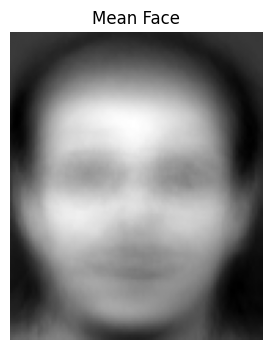

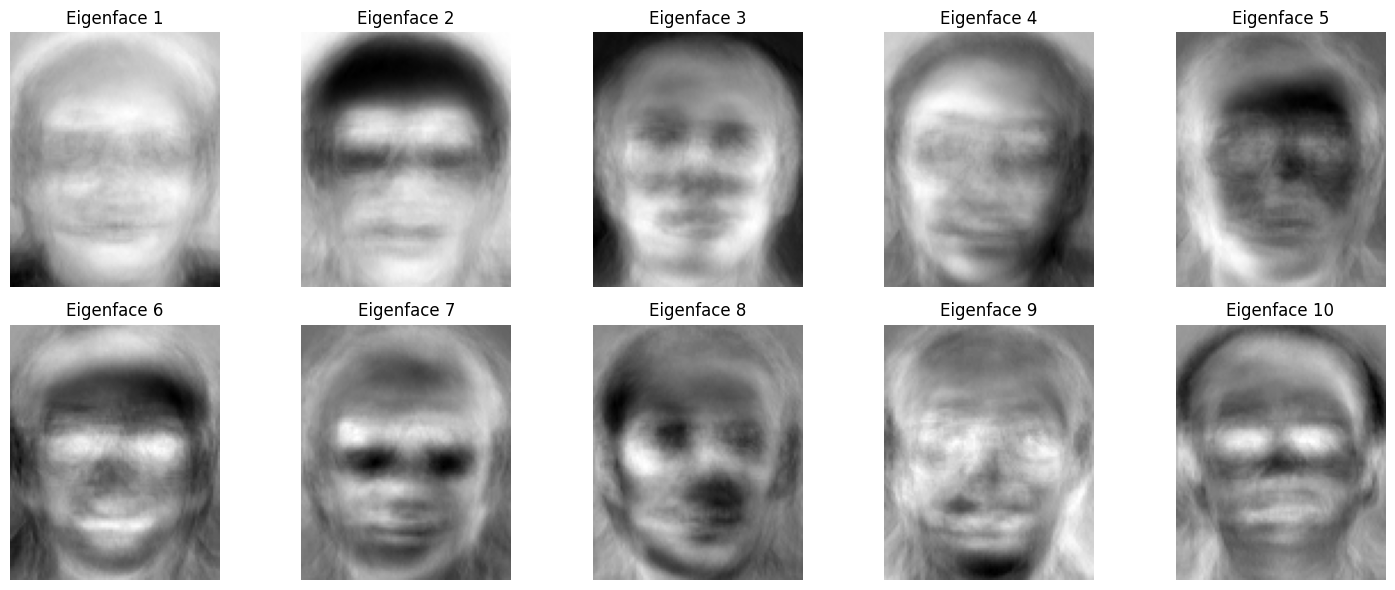

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mean face
X_mean = np.mean(X_train, axis=0)
mean_face_img = X_mean.reshape(112, 92)

plt.figure(figsize=(4, 4))
plt.imshow(mean_face_img, cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()

# First 10 Eigenfaces
n_eigenfaces = 10
plt.figure(figsize=(15, 6))
for i in range(n_eigenfaces):
    eigenface_img = eigvec[:, i].reshape(112, 92)  # eigvec must be sorted already
    plt.subplot(2, 5, i+1)
    plt.imshow(eigenface_img, cmap="gray")
    plt.title(f"Eigenface {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


#4

In [ ]:
# After sorting eigenvectors by eigenvalues
eigfaces = eigvec   # alias for clarity

In [ ]:
# Function to project data into PCA space
def project_data(X, eigfaces, k):
    """ Project data X into PCA space using top k eigenfaces """
    return np.dot(X, eigfaces[:, :k])

# Try different values of k
k_values = [50, 100, 150, 200, 250]

for k in k_values:
    X_train_pca = project_data(X_train_std, eigfaces, k)
    X_test_pca  = project_data(X_test_std, eigfaces, k)

    print(f"k = {k}")
    print("  Projected X_train_pca shape:", X_train_pca.shape)
    print("  Projected X_test_pca  shape:", X_test_pca.shape)
    print("-"*40)


k = 50
  Projected X_train_pca shape: (360, 50)
  Projected X_test_pca  shape: (40, 50)
----------------------------------------
k = 100
  Projected X_train_pca shape: (360, 100)
  Projected X_test_pca  shape: (40, 100)
----------------------------------------
k = 150
  Projected X_train_pca shape: (360, 150)
  Projected X_test_pca  shape: (40, 150)
----------------------------------------
k = 200
  Projected X_train_pca shape: (360, 200)
  Projected X_test_pca  shape: (40, 200)
----------------------------------------
k = 250
  Projected X_train_pca shape: (360, 250)
  Projected X_test_pca  shape: (40, 250)
----------------------------------------


In [ ]:
# Specific k values
k_values = [50, 100, 150, 200, 250]

reconstructions = {}

for k in k_values:
    top_k_eigenvectors = eigvec[:, :k]

    # Project training data
    X_pca = np.dot(X_train_std, top_k_eigenvectors)

    # Reconstruct
    X_reconstructed_std = np.dot(X_pca, top_k_eigenvectors.T)
    X_reconstructed = scaler.inverse_transform(X_reconstructed_std)

    reconstructions[k] = X_reconstructed
    print(f"k = {k}, Reconstructed shape: {X_reconstructed.shape}")


k = 50, Reconstructed shape: (360, 10304)
k = 100, Reconstructed shape: (360, 10304)
k = 150, Reconstructed shape: (360, 10304)
k = 200, Reconstructed shape: (360, 10304)
k = 250, Reconstructed shape: (360, 10304)


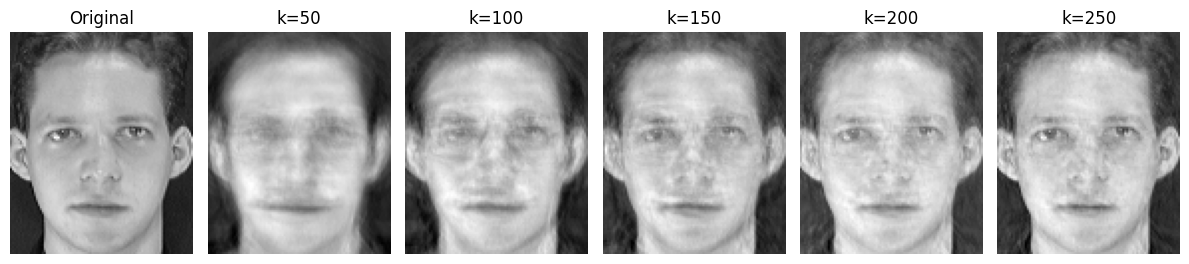

In [ ]:
index = 1  # pick an image index

original_img = X_train[index].reshape(112, 92)

plt.figure(figsize=(12, 6))

# show original once
plt.subplot(1, len(k_values)+1, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original")
plt.axis('off')

# loop over k
for i, k in enumerate(k_values, start=2):
    reconstructed_img = reconstructions[k][index].reshape(112, 92)
    plt.subplot(1, len(k_values)+1, i)
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f"k={k}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Specific k values
k_values = [50, 100, 150, 200, 250]

errors = {}

for k in k_values:
    top_k_eigenvectors = eigvec[:, :k]

    # Project data
    X_pca = np.dot(X_train_std, top_k_eigenvectors)

    # Reconstruct
    X_reconstructed_std = np.dot(X_pca, top_k_eigenvectors.T)

    # Reconstruction error (MSE)
    reconstruction_error = np.mean(np.square(X_train_std - X_reconstructed_std))
    errors[k] = reconstruction_error

    print(f"k = {k}, Reconstruction Error = {reconstruction_error:.6f}")


k = 50, Reconstruction Error = 0.183662
k = 100, Reconstruction Error = 0.106001
k = 150, Reconstruction Error = 0.065773
k = 200, Reconstruction Error = 0.039704
k = 250, Reconstruction Error = 0.021674


#5

In [ ]:
# Function to project data into PCA space
def project_data(X, eigfaces, k):
    return np.dot(X, eigfaces[:, :k])

# Example: project training and testing data for k=100
k = 100
X_train_pca = project_data(X_train_std, eigfaces, k)
X_test_pca  = project_data(X_test_std, eigfaces, k)

print("Projected X_train_pca shape:", X_train_pca.shape)
print("Projected X_test_pca shape:", X_test_pca.shape)


Projected X_train_pca shape: (360, 100)
Projected X_test_pca shape: (40, 100)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Nearest Neighbor classifier (1-NN with Euclidean distance)
nn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Train classifier in PCA space (using chosen k)
nn.fit(X_train_pca, y_train)

# Predict on test set
y_pred = nn.predict(X_test_pca)


In [ ]:
from sklearn.metrics import accuracy_score

# PCA dimensions to try
k_values = [50, 100, 150, 200, 250]

results = {}

for k in k_values:
    # Project data
    X_train_pca = project_data(X_train_std, eigfaces, k)
    X_test_pca  = project_data(X_test_std, eigfaces, k)

    # Train + predict with NN
    nn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    nn.fit(X_train_pca, y_train)
    y_pred = nn.predict(X_test_pca)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    print(f"k = {k}, Recognition Accuracy = {acc:.4f}")


k = 50, Recognition Accuracy = 0.9500
k = 100, Recognition Accuracy = 0.9500
k = 150, Recognition Accuracy = 0.9250
k = 200, Recognition Accuracy = 0.9000
k = 250, Recognition Accuracy = 0.9000


#6

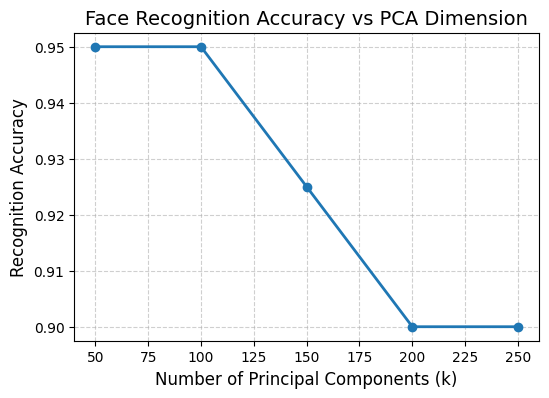

In [ ]:
import matplotlib.pyplot as plt

# --- Plot Accuracy vs k ---
plt.figure(figsize=(6,4))
plt.plot(list(results.keys()), list(results.values()), marker='o', linewidth=2)
plt.xlabel("Number of Principal Components (k)", fontsize=12)
plt.ylabel("Recognition Accuracy", fontsize=12)
plt.title("Face Recognition Accuracy vs PCA Dimension", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# ***Bonus Task***

In [ ]:
from sklearn.manifold import TSNE
# --- Step 1: Reduce with PCA (top 50 components) ---
k_tsne = 50
W_tsne = eigfaces[:, :k_tsne]            # (10304, 50)
X_train_pca_tsne = X_train_std @ W_tsne  # (360, 50)

# --- Step 2: Run t-SNE (2D) ---

tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca_tsne)

print("t-SNE reduced shape:", X_train_tsne.shape)
print(X_train_tsne[:5])  # show first 5 rows


t-SNE reduced shape: (360, 2)
[[  1.4193615 -26.79454  ]
 [ 12.95937    15.437238 ]
 [  0.2618099 -27.601337 ]
 [ -1.6022012 -24.999166 ]
 [ 13.771335   15.027723 ]]


2D

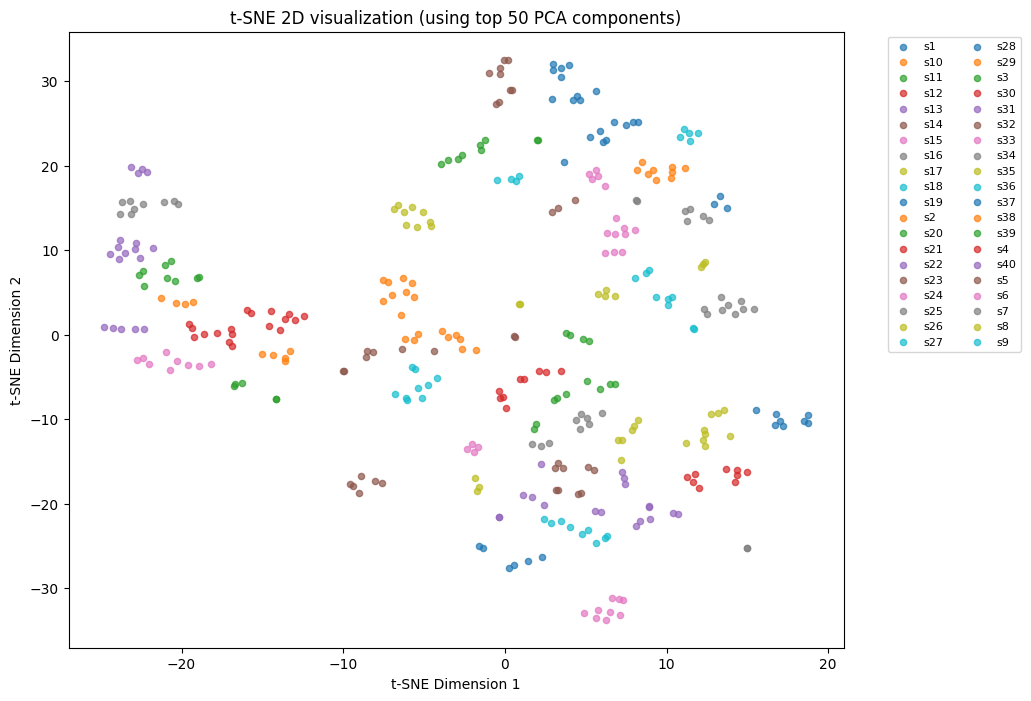

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Run t-SNE (50D PCA → 2D) ---
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca_tsne)

# --- Step 2: Plot subjects (s1...s40) ---
plt.figure(figsize=(10,8))
for subj in np.unique(y_train):
    idx = np.where(y_train == subj)
    plt.scatter(X_train_tsne[idx,0], X_train_tsne[idx,1], s=20, label=subj, alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2, fontsize=8)
plt.title("t-SNE 2D visualization (using top 50 PCA components)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


# 3D

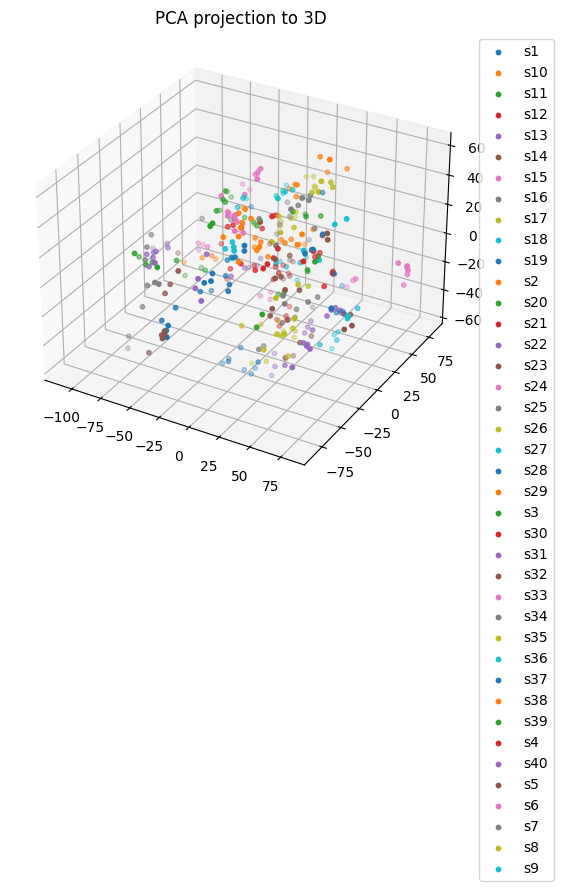

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

W_3d = eigfaces[:, :3]                 # top 3 eigenfaces
X_train_pca_3d = X_train_std @ W_3d

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for subject in np.unique(y_train):
    idx = np.where(y_train == subject)[0]
    ax.scatter(X_train_pca_3d[idx,0], X_train_pca_3d[idx,1], X_train_pca_3d[idx,2], s=10, label=subject)
ax.set_title("PCA projection to 3D")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
